# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [40]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [41]:
# Set the API base URL
weather_api_key = "aec24e1a664ee9e0b09bd2e7f13b24c8"
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"City not found. Skipping {city}...")
    
    except Exception as e:
        print(f"An error occurred for {city}: {e}")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lavras da mangabeira
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | mukalla
Processing Record 8 of Set 1 | taiohae
City not found. Skipping taiohae...
Processing Record 9 of Set 1 | zadonsk
Processing Record 10 of Set 1 | brookings
Processing Record 11 of Set 1 | port glaud
City not found. Skipping port glaud...
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | kotel
Processing Record 16 of Set 1 | champerico
Processing Record 17 of Set 1 | tadine
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | kittila
Processing Record 21 of Set 1 

In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lavras da mangabeira,-6.7533,-38.9644,308.39,23,54,3.38,BR,1702323693
1,adamstown,-25.0660,-130.1015,294.70,61,1,2.48,PN,1702323693
2,waitangi,-43.9535,-176.5597,287.49,88,100,3.13,NZ,1702323693
3,papatowai,-46.5619,169.4708,281.92,70,54,8.90,NZ,1702323693
4,stanley,54.8680,-1.6985,275.24,100,0,1.54,GB,1702323409


In [44]:
import os

# Check if the "output_data" directory exists, and create it if not
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_directory, "cities.csv"), index_label="City_ID")



In [45]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lavras da mangabeira,-6.7533,-38.9644,308.39,23,54,3.38,BR,1702323693
1,adamstown,-25.0660,-130.1015,294.70,61,1,2.48,PN,1702323693
2,waitangi,-43.9535,-176.5597,287.49,88,100,3.13,NZ,1702323693
3,papatowai,-46.5619,169.4708,281.92,70,54,8.90,NZ,1702323693
4,stanley,54.8680,-1.6985,275.24,100,0,1.54,GB,1702323409


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

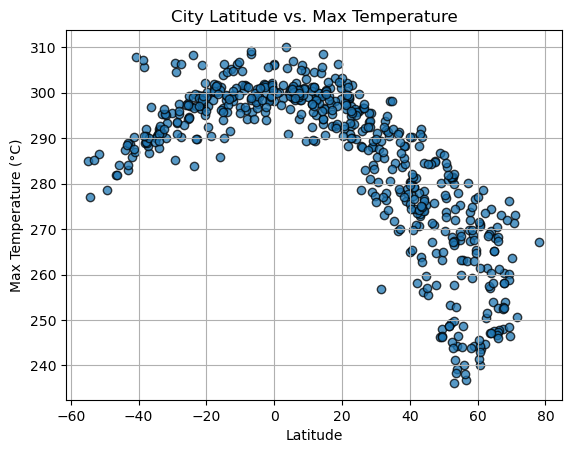

In [46]:
## Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

plt.savefig(os.path.join(output_directory, "Fig1.png"))

# Show plot
plt.show()


#### Latitude Vs. Humidity

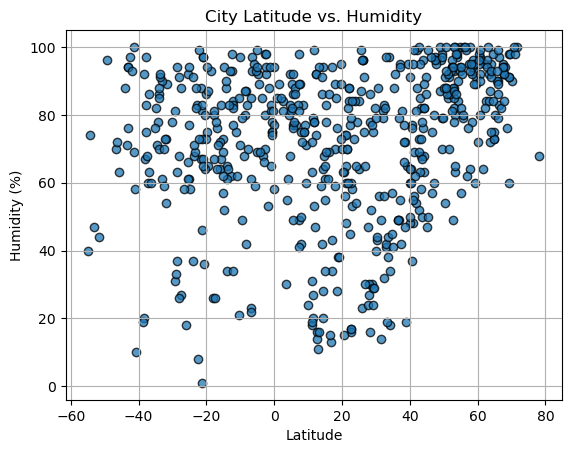

In [47]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

plt.savefig(os.path.join(output_directory, "Fig2.png"))

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

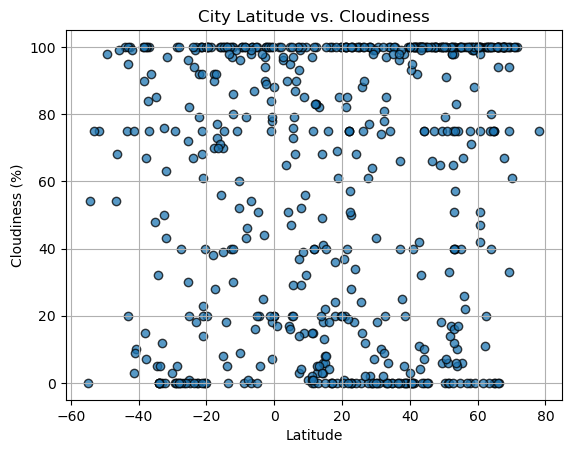

In [48]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

plt.savefig(os.path.join(output_directory, "Fig3.png"))

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

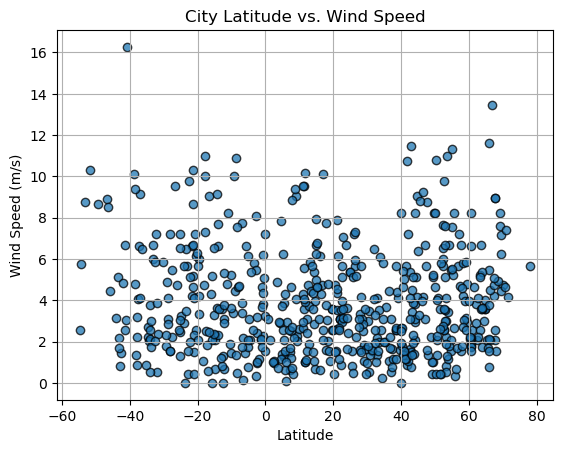

In [49]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

plt.savefig(os.path.join(output_directory, "Fig4.png"))

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create a scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    
    # Label the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,stanley,54.8680,-1.6985,275.24,100,0,1.54,GB,1702323409
6,mukalla,14.5425,49.1242,296.60,68,13,0.67,YE,1702323693
7,zadonsk,52.3904,38.9261,268.17,94,100,7.65,RU,1702323693
8,brookings,44.3114,-96.7984,278.40,63,0,5.14,US,1702323429
9,harper,4.3750,-7.7169,300.01,80,17,2.89,LR,1702323694


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7131820420216781


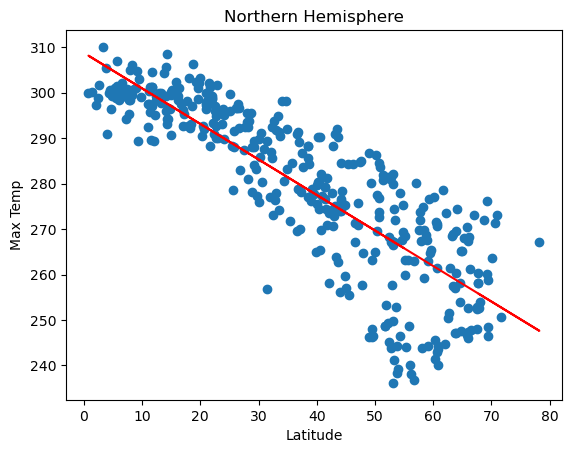

In [60]:
# Northern Hemisphere 
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"],
                       "Northern Hemisphere",
                       "Latitude", "Max Temp", (40, 12))





The r-squared is: 0.444630060140897


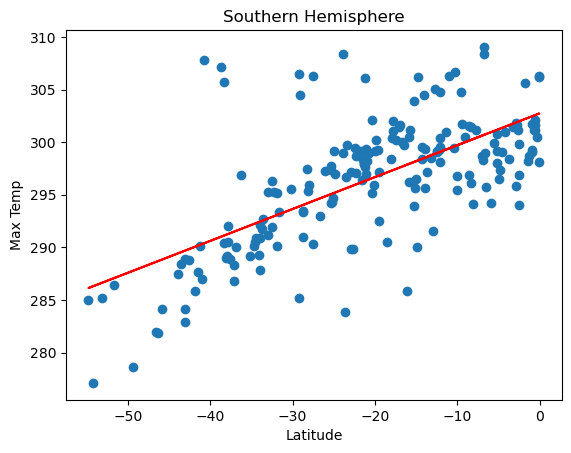

In [62]:
# Southern Hemisphere 
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"],
                       "Southern Hemisphere",
                       "Latitude", "Max Temp", (-30, 10))




**Discussion about the linear relationship:** YOUR RESPONSE HERE in the northern hempisphere as the latitude increases the max temp descreases, and the inverse happens in the southern hemsiphere where the higher the latitude the hotter the overall temp

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.17154064708422417


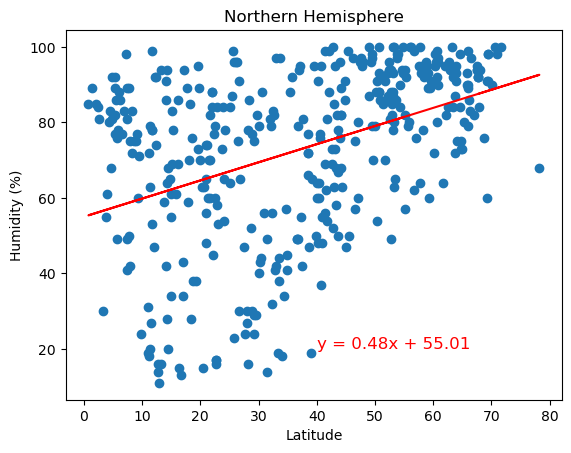

In [63]:
# Northern Hemisphere - Example: Humidity vs. Latitude
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"],
                       "Northern Hemisphere",
                       "Latitude", "Humidity (%)", (40, 20))


The r-squared is: 0.01504210372465644


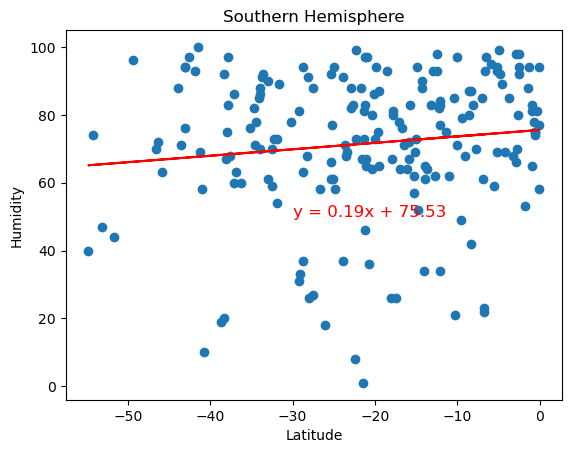

In [64]:
# Southern Hemisphere 
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"],
                       "Southern Hemisphere",
                       "Latitude", "Humidity", (-30, 50))


**Discussion about the linear relationship:** YOUR RESPONSE HERE There does not seem to be a correlation between the latitude and humidity on the Northern and Southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.051469724668242116


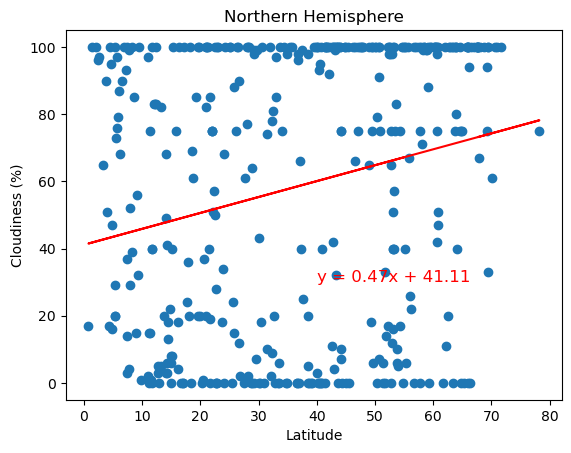

In [65]:
# Northern Hemisphere 
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"],
                       "Northern Hemisphere",
                       "Latitude", "Cloudiness (%)", (40, 30))


The r-squared is: 0.015302311393908325


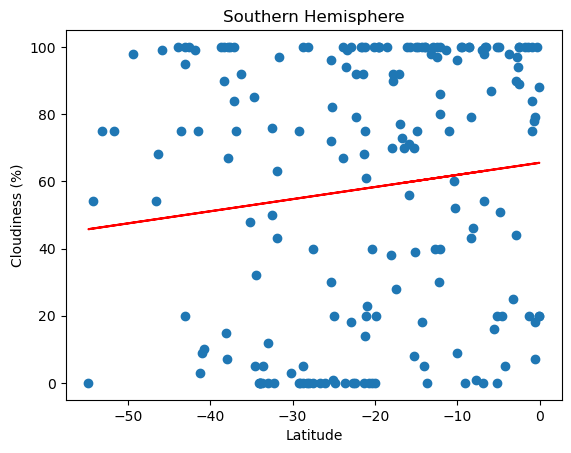

In [66]:
# Northern Hemisphere - Example: Cloudiness vs. Latitude
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"],
                       "Southern Hemisphere",
                       "Latitude", "Cloudiness (%)", (40, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE the relationship betweeen the effect of cloudiness on latitude have the same basic relationship compared to nothern and southern hemisphere 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.02227719971702705


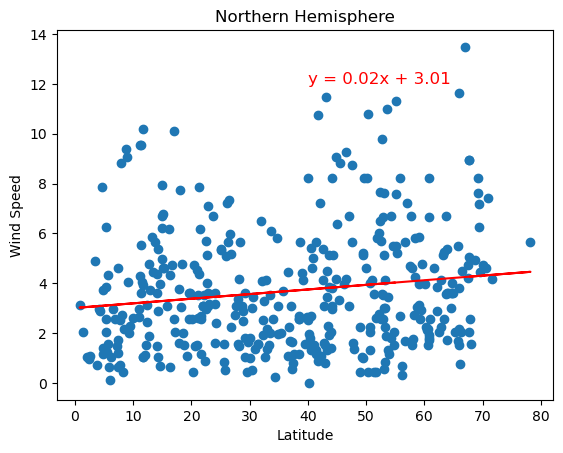

In [67]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"],
                       "Northern Hemisphere",
                       "Latitude", "Wind Speed", (40, 12))


The r-squared is: 0.02803129986811395


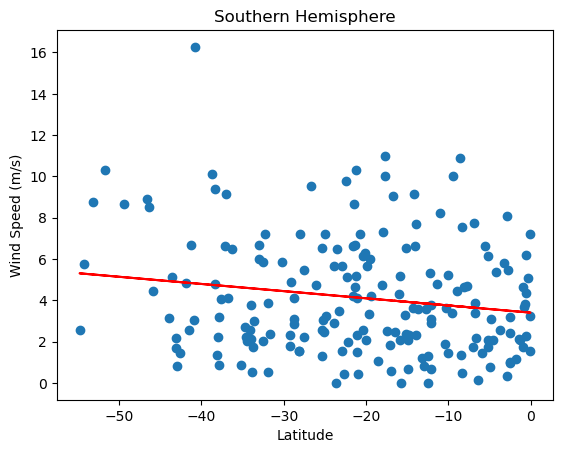

In [69]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"],
                       "Southern Hemisphere",
                       "Latitude", "Wind Speed (m/s)", (40, 12))


**Discussion about the linear relationship:** YOUR RESPONSE HERE the relationship between the two hemisphere's seems to be inverted as the northern as an upward slope and the southern has a downward slope - however they are both rather small. 